In [ ]:
pip install scikit-learn

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
 pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 21.3 MB/s eta 0:00:00


In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout
import hdbscan
import umap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading stock market data into a pandas dataframe for further analysis. The file contains historical stock prices and various technical indicators related to the top 10 NASDAQ companies.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df

Date    Open    High     Low   Close  Adj Close     Volume  \
0      2023-12-29  376.00  377.16  373.48  376.04     374.00   18723000   
1      2023-12-28  375.37  376.46  374.16  375.28     373.24   14327000   
2      2023-12-27  373.69  375.06  372.81  374.07     372.04   14905400   
3      2023-12-26  375.00  376.94  373.50  374.66     372.62   12673100   
4      2023-12-22  373.68  375.18  372.71  374.58     372.54   17091100   
...           ...     ...     ...     ...     ...        ...        ...   
53683  2012-05-24   32.95   33.21   31.77   33.03      32.93   50237200   
53684  2012-05-23   31.37   32.50   31.36   32.00      31.90   73600000   
53685  2012-05-22   32.61   33.59   30.94   31.00      30.91  101786600   
53686  2012-05-21   36.53   36.66   33.00   34.03      33.93  168192700   
53687  2012-05-18   42.05   45.00   38.00   38.23      38.12  573576400   

       garman_klass_vol        rsi    bb_low    bb_mid   bb_high       atr  \
0              0.000037        NaN       NaN       NaN       NaN       NaN   
1              0.000006        NaN       NaN       NaN       NaN       NaN   
2              0.000011        NaN       NaN       NaN       NaN       NaN   
3              0.000026        NaN       NaN       NaN       NaN       NaN   
4              0.000018        NaN       NaN       NaN       NaN       NaN   
...                 ...        ...       ...       ...       ...       ...   
53683          0.000982  62.650704  3.248486  3.394003  3.539520  0.194881   
53684          0.000529  59.160371  3.248081  3.394247  3.540412  0.193104   
53685          0.002269  56.003681  3.249164  3.393315  3.537467  0.194311   
53686          0.003425  62.439205  3.241641  3.396446  3.551250  0.194717   
53687          0.010574  69.050728  3.213784  3.405993  3.598202  0.192952   

           macd  dollar_volume  Ticker_numeric  Company_Name_numeric  
0           NaN    7002.402000              28                    29  
1           NaN    5347.409480              28                    29  
2           NaN    5545.405016              28                    29  
3           NaN    4722.250522              28                    29  
4           NaN    6367.118394              28                    29  
...         ...            ...             ...                   ...  
53683  0.333104    1654.310996              26                    26  
53684  0.512131    2347.840000              26                    26  
53685  0.567584    3146.223806              26                    26  
53686  0.845473    5706.778311              26                    26  
53687  1.387802   21864.732368              26                    26  

[53688 rows x 17 columns]

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric'],
      dtype='object')

## Removes any rows that contain NaN (missing) values from the dataframe

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns without setting 'Date' as the index
df['Monthly_Returns'] = df.groupby(df['Date'].dt.to_period('M'))['Close'].ffill().pct_change().reset_index(drop=True)

# Check the updated dataframe
df.dropna(inplace = True)
df


Date    Open    High     Low   Close  Adj Close     Volume  \
25    2023-11-22  378.00  379.79  374.97  377.85     375.80   23345300   
26    2023-11-21  375.67  376.22  371.12  373.07     371.04   28423100   
27    2023-11-20  371.22  378.87  371.00  377.44     375.39   52465100   
28    2023-11-17  373.61  374.37  367.00  369.85     367.84   40157000   
29    2023-11-16  370.96  376.35  370.18  376.17     374.13   27182300   
...          ...     ...     ...     ...     ...        ...        ...   
53683 2012-05-24   32.95   33.21   31.77   33.03      32.93   50237200   
53684 2012-05-23   31.37   32.50   31.36   32.00      31.90   73600000   
53685 2012-05-22   32.61   33.59   30.94   31.00      30.91  101786600   
53686 2012-05-21   36.53   36.66   33.00   34.03      33.93  168192700   
53687 2012-05-18   42.05   45.00   38.00   38.23      38.12  573576400   

       garman_klass_vol        rsi    bb_low    bb_mid   bb_high        atr  \
25             0.000068  53.856228  5.899463  5.921131  5.942798  14.154920   
26             0.000034  47.581805  5.900131  5.921459  5.942786  14.032450   
27             0.000172  52.864381  5.900342  5.922014  5.943687  13.674604   
28             0.000104  44.644496  5.899439  5.921639  5.943839  13.838413   
29             0.000109  51.286943  5.900431  5.922366  5.944302  13.781135   
...                 ...        ...       ...       ...       ...        ...   
53683          0.000982  62.650704  3.248486  3.394003  3.539520   0.194881   
53684          0.000529  59.160371  3.248081  3.394247  3.540412   0.193104   
53685          0.002269  56.003681  3.249164  3.393315  3.537467   0.194311   
53686          0.003425  62.439205  3.241641  3.396446  3.551250   0.194717   
53687          0.010574  69.050728  3.213784  3.405993  3.598202   0.192952   

           macd  dollar_volume  Ticker_numeric  Company_Name_numeric  \
25     2.310112    8773.163740              28                    29   
26     1.874908   10546.107024              28                    29   
27     1.859577   19694.873889              28                    29   
28     1.224096   14771.350880              28                    29   
29     1.214028   10169.713899              28                    29   
...         ...            ...             ...                   ...   
53683  0.333104    1654.310996              26                    26   
53684  0.512131    2347.840000              26                    26   
53685  0.567584    3146.223806              26                    26   
53686  0.845473    5706.778311              26                    26   
53687  1.387802   21864.732368              26                    26   

       Monthly_Returns  
25            0.001113  
26           -0.012651  
27            0.011714  
28           -0.020109  
29            0.017088  
...                ...  
53683         0.035099  
53684        -0.031184  
53685        -0.031250  
53686         0.097742  
53687         0.123421  

[53326 rows x 18 columns]

In [ ]:
df.dropna(inplace = True)


# Features to use for clustering
features = df[['Monthly_Returns', 'garman_klass_vol', 'atr', 'macd']].dropna()

# Number of clusters
n_clusters = 4

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
df

Date    Open    High     Low   Close  Adj Close     Volume  \
25    2023-11-22  378.00  379.79  374.97  377.85     375.80   23345300   
26    2023-11-21  375.67  376.22  371.12  373.07     371.04   28423100   
27    2023-11-20  371.22  378.87  371.00  377.44     375.39   52465100   
28    2023-11-17  373.61  374.37  367.00  369.85     367.84   40157000   
29    2023-11-16  370.96  376.35  370.18  376.17     374.13   27182300   
...          ...     ...     ...     ...     ...        ...        ...   
53683 2012-05-24   32.95   33.21   31.77   33.03      32.93   50237200   
53684 2012-05-23   31.37   32.50   31.36   32.00      31.90   73600000   
53685 2012-05-22   32.61   33.59   30.94   31.00      30.91  101786600   
53686 2012-05-21   36.53   36.66   33.00   34.03      33.93  168192700   
53687 2012-05-18   42.05   45.00   38.00   38.23      38.12  573576400   

       garman_klass_vol        rsi    bb_low    bb_mid   bb_high        atr  \
25             0.000068  53.856228  5.899463  5.921131  5.942798  14.154920   
26             0.000034  47.581805  5.900131  5.921459  5.942786  14.032450   
27             0.000172  52.864381  5.900342  5.922014  5.943687  13.674604   
28             0.000104  44.644496  5.899439  5.921639  5.943839  13.838413   
29             0.000109  51.286943  5.900431  5.922366  5.944302  13.781135   
...                 ...        ...       ...       ...       ...        ...   
53683          0.000982  62.650704  3.248486  3.394003  3.539520   0.194881   
53684          0.000529  59.160371  3.248081  3.394247  3.540412   0.193104   
53685          0.002269  56.003681  3.249164  3.393315  3.537467   0.194311   
53686          0.003425  62.439205  3.241641  3.396446  3.551250   0.194717   
53687          0.010574  69.050728  3.213784  3.405993  3.598202   0.192952   

           macd  dollar_volume  Ticker_numeric  Company_Name_numeric  \
25     2.310112    8773.163740              28                    29   
26     1.874908   10546.107024              28                    29   
27     1.859577   19694.873889              28                    29   
28     1.224096   14771.350880              28                    29   
29     1.214028   10169.713899              28                    29   
...         ...            ...             ...                   ...   
53683  0.333104    1654.310996              26                    26   
53684  0.512131    2347.840000              26                    26   
53685  0.567584    3146.223806              26                    26   
53686  0.845473    5706.778311              26                    26   
53687  1.387802   21864.732368              26                    26   

       Monthly_Returns  Cluster  
25            0.001113        1  
26           -0.012651        1  
27            0.011714        1  
28           -0.020109        1  
29            0.017088        1  
...                ...      ...  
53683         0.035099        0  
53684        -0.031184        0  
53685        -0.031250        0  
53686         0.097742        0  
53687         0.123421        0  

[53326 rows x 19 columns]

## Selecting relevant stock features. PCA is applied to reduce the dimensionality of the data for easier visualization and analysis.
## K-Means clustering is used to group the stocks into distinct clusters based on their features.
## Finally, the clusters are visualized in a 2D plot using the PCA-transformed data.

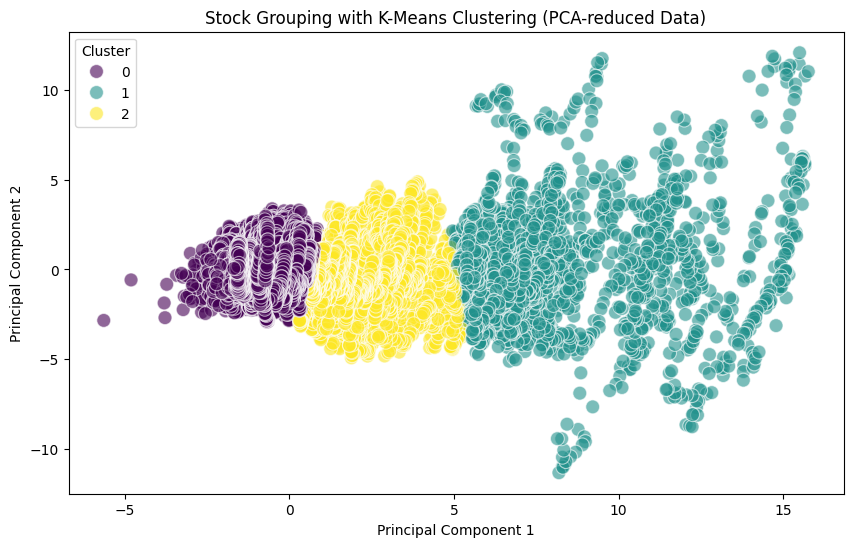

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd']
X = df[features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with K-Means Clustering (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Assuming 'X' is your feature set used for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Calculate silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for K-Means: {score:.2f}")

Silhouette Score for K-Means: 0.83


## Mapping the cluster labels from the PCA-transformed data back to the original stock data, so we can map which companies belong to each cluster.

In [ ]:
df['Cluster'] = df_pca['Cluster']

# Display companies in each cluster
for cluster_num in df['Cluster'].unique():
    cluster_stocks = df[df['Cluster'] == cluster_num]
    print(f"Companies in Cluster {cluster_num}:")
    print(cluster_stocks[['Date', 'Company_Name_numeric', 'Ticker_numeric', 'Cluster']])
    print("\n")

Companies in Cluster 1.0:
            Date  Company_Name_numeric  Ticker_numeric  Cluster
25    2023-11-22                    29              28      1.0
26    2023-11-21                    29              28      1.0
27    2023-11-20                    29              28      1.0
28    2023-11-17                    29              28      1.0
29    2023-11-16                    29              28      1.0
...          ...                   ...             ...      ...
51258 2022-01-12                    26              26      1.0
51259 2022-01-11                    26              26      1.0
51260 2022-01-10                    26              26      1.0
51261 2022-01-07                    26              26      1.0
51262 2022-01-06                    26              26      1.0

[2414 rows x 4 columns]


Companies in Cluster 2.0:
            Date  Company_Name_numeric  Ticker_numeric  Cluster
209   2023-03-02                    29              28      2.0
213   2023-02-24         

### Reducing the dimensionality of the data using PCA, then applying K-Means clustering to identify groups of similar stocks.
### t-SNE is then used to visualize the data in 2D, with coloring based on the K-Means clusters.
### Finally, the visualization helps to understand the grouping of stocks and how well-separated the clusters are.

df_pca columns: Index(['PCA1', 'PCA2', 'Cluster_KMeans'], dtype='object')


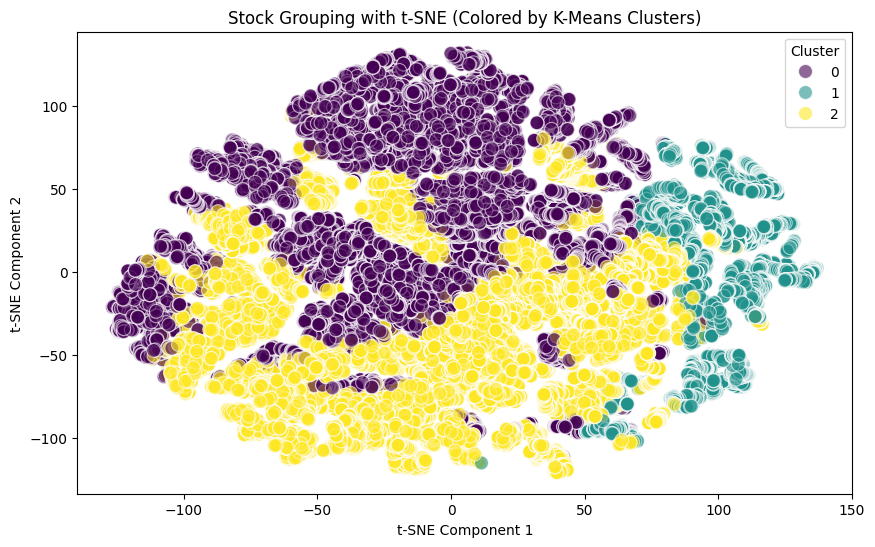

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster_KMeans'] = clusters

# Ensure Cluster_KMeans is added correctly
print("df_pca columns:", df_pca.columns)

# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
if 'Cluster_KMeans' in df_pca.columns:
    df_tsne = df_tsne.join(df_pca[['Cluster_KMeans']])
else:
    print("Error: 'Cluster_KMeans' column not found in df_pca.")


# Visualizing t-SNE Results (Colored by K-Means Clusters)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster_KMeans', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with t-SNE (Colored by K-Means Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

### HDBSCAN can find clusters of varying densities and sizes, making it a more flexible choice for real-world datasets where the number of clusters is not known beforehand. It also handles noise by leaving some points unclustered.
### The scatter plot allows to visualize the 2D PCA-reduced data and inspect the clusters identified by HDBSCAN.

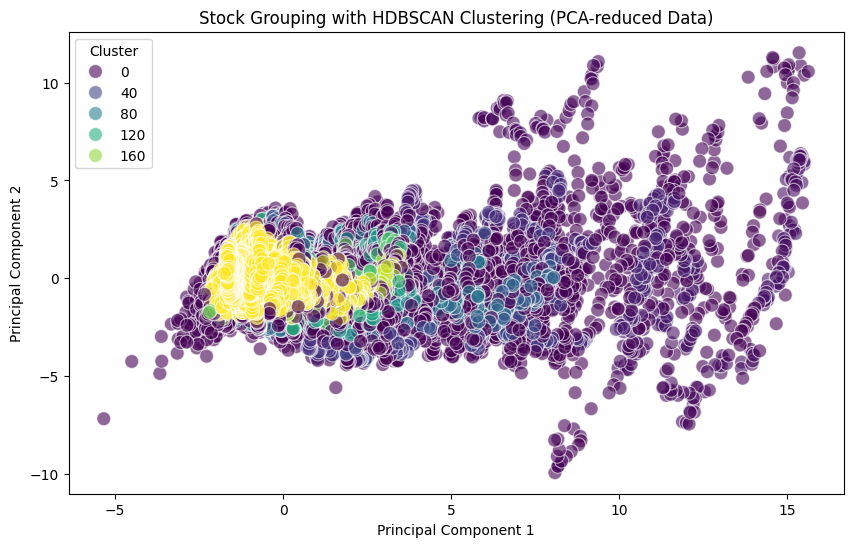

In [73]:
# Features for PCA
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# HDBSCAN Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, cluster_selection_epsilon=0.05,cluster_selection_method='leaf')
clusters = hdbscan_clusterer.fit_predict(X_pca)
df_pca['Cluster'] = clusters

# Visualizing Clusters with HDBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with HDBSCAN Clustering (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [74]:
# Assuming 'X' is your feature set used for clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=3)
hdbscan_clusterer.fit(X)

# Calculate silhouette score
score = silhouette_score(X, hdbscan_clusterer.labels_)
print(f"Silhouette Score for HDBSCAN: {score:.2f}")

Silhouette Score for HDBSCAN: 0.41


### Parameters for the HDBSCAN clustering are updated to generate larger, more conservative clusters

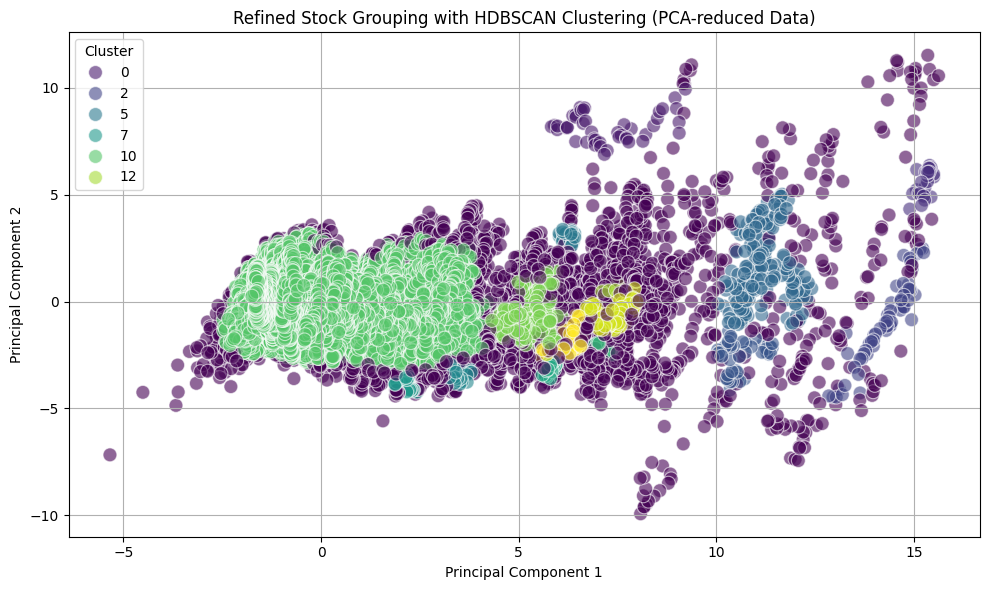

In [ ]:
# Features for PCA
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]

# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

### Refined HDBSCAN Clustering with tuned parameters ###
# We increase min_cluster_size and min_samples to make clusters larger and more conservative.
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10, cluster_selection_epsilon=0.1)
clusters = hdbscan_clusterer.fit_predict(X_pca)
df_pca['Cluster'] = clusters

# Visualizing the refined clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)


plt.title('Refined Stock Grouping with HDBSCAN Clustering (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Assuming 'X' is your feature set used for clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=3, cluster_selection_epsilon=0.1)
hdbscan_clusterer.fit(X)

# Calculate silhouette score
score = silhouette_score(X, hdbscan_clusterer.labels_)
print(f"Silhouette Score for HDBSCAN: {score:.2f}")

Silhouette Score for HDBSCAN: 0.36


### Replaceing PCA with UMAP for dimensionality reduction and using HDBSCAN for clustering.
### UMAP is a non-linear dimensionality reduction technique that is very effective for visualizing high-dimensional data in lower dimensions. Unlike PCA, UMAP preserves both global and local structures in the data, making it useful for clustering.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


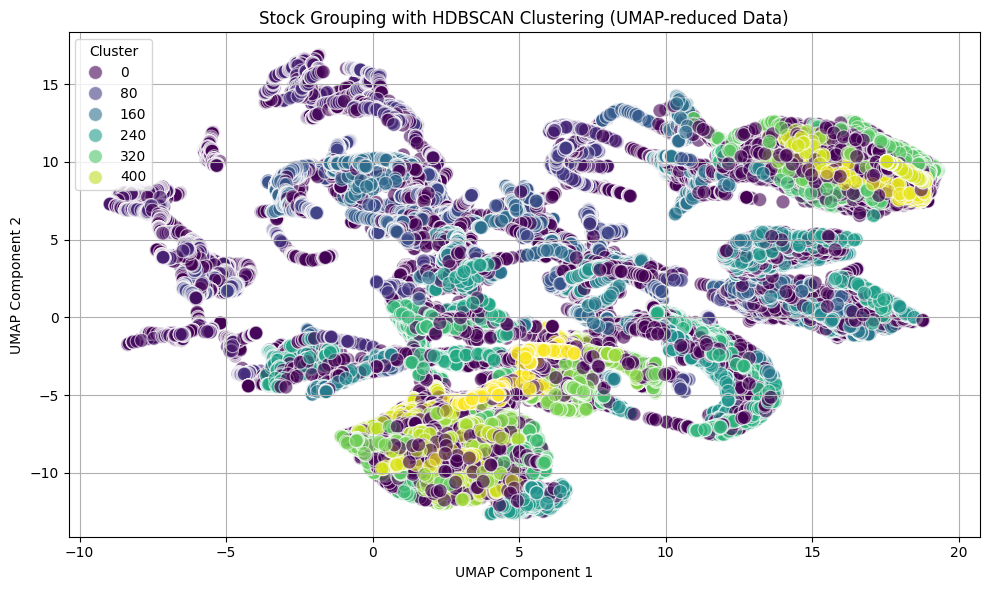

In [ ]:
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=25, min_samples=10, cluster_selection_epsilon=0.1, cluster_selection_method='leaf')
clusters = hdbscan_clusterer.fit_predict(X_umap)
df_umap['Cluster'] = clusters

# Visualizing the UMAP projection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with HDBSCAN Clustering (UMAP-reduced Data)')

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### Scaling the features, then training an XGBoost regression model on the scaled data.
### The model’s feature importance is plotted to give insights into which features are important in predicting the stock’s closing price

X_train shape: (29862, 11), y_train shape: (29862,)
X_val shape: (12798, 11), y_val shape: (12798,)
X_test shape: (10666, 11), y_test shape: (10666,)


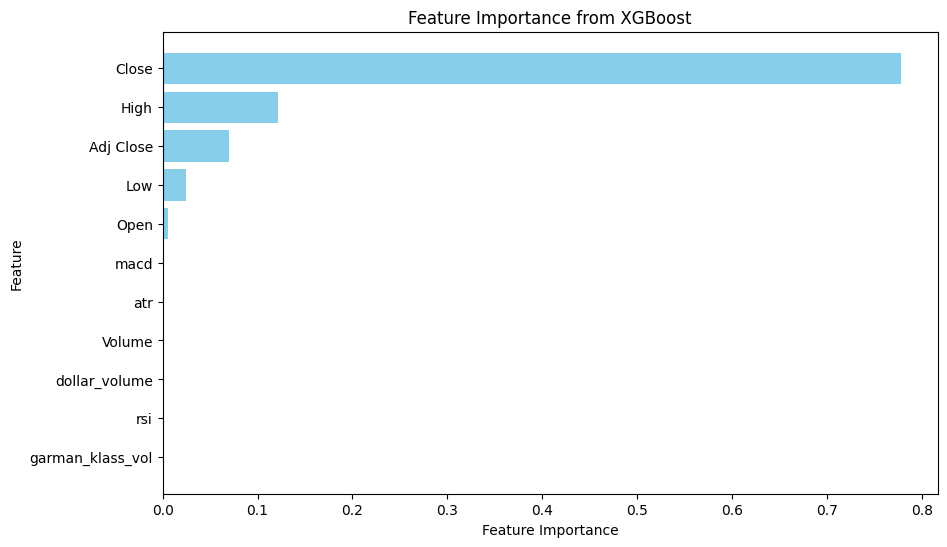

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Split the training+validation set into separate training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Print the shapes of each dataset to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Plot feature importance with feature names
feature_importances = xgboost_model.feature_importances_

# Map feature importance values to the feature names
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a barh plot (horizontal bar plot) for better readability
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.show()

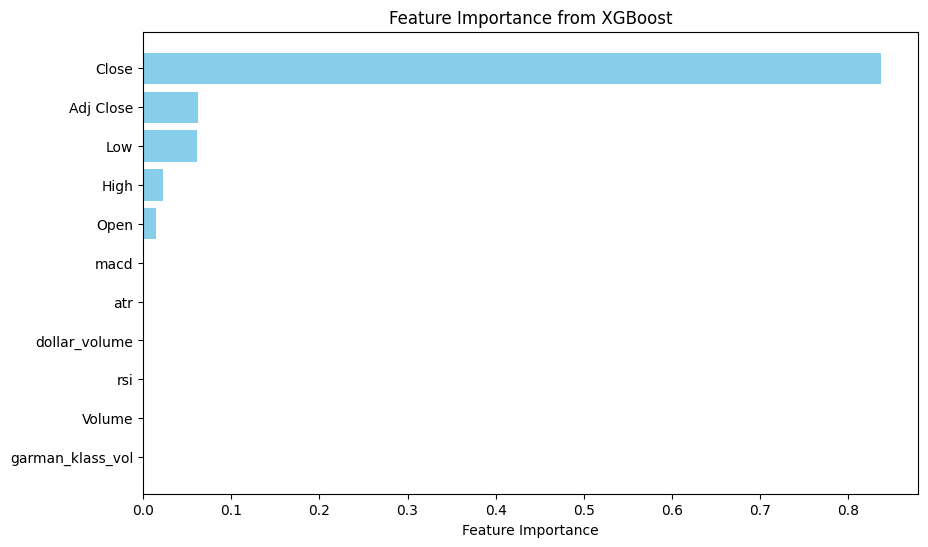

Shape of X_lstm_train: (31992, 3, 11)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 8101.6372 - val_loss: 7259.3936
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7194.4834 - val_loss: 7321.8203
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 6717.2295 - val_loss: 7243.7114
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 6949.6001 - val_loss: 7250.0605
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7389.9668 - val_loss: 7245.0581
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 7120.6880 - val_loss: 7241.2471
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 7167.1421 - val_loss: 7300.3101
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7156.6626 - val_loss: 7260.7891
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 7332.8774 - val_loss: 7245.9810
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7235.8120 - val_loss: 7258.1157
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 7108.5098 - val_loss: 7247

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the features and target
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
            'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]
y = df['Close']  # Target variable ('Close' price to predict)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the XGBoost model to determine feature importance
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Extract feature importances and map them to feature names
importances = xgboost_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importance with feature names on y-axis
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

# Prepare data for LSTM
timesteps = 3  # Define the number of previous time steps to use
X_lstm_train = []
y_lstm_train = []

# Reshape the training data into sequences
for i in range(timesteps, len(X_train)):
    X_lstm_train.append(X_train[i-timesteps:i])  # Take 'timesteps' previous rows for each sequence
    y_lstm_train.append(y_train.iloc[i])         # The target is the value at the current time step

X_lstm_train = np.array(X_lstm_train)
y_lstm_train = np.array(y_lstm_train)

# Ensure LSTM input shape is (samples, timesteps, features)
print(f"Shape of X_lstm_train: {X_lstm_train.shape}")  # Should be (samples, timesteps, features)

# Define LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
model.add(Dense(1))  # Output layer for predicting stock price

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_lstm_train, y_lstm_train, validation_split=0.2, epochs=50, batch_size=32)

# Prepare test data for LSTM
X_lstm_test = []
y_lstm_test = []

for i in range(timesteps, len(X_test)):
    X_lstm_test.append(X_test[i-timesteps:i])
    y_lstm_test.append(y_test.iloc[i])

X_lstm_test = np.array(X_lstm_test)
y_lstm_test = np.array(y_lstm_test)

# Evaluate LSTM model
loss = model.evaluate(X_lstm_test, y_lstm_test)
print(f"LSTM Model Loss (Mean Squared Error) on Test Set: {loss}")


###  Integrating both XGBoost for feature importance and an LSTM model for time-series forecasting of stock prices.

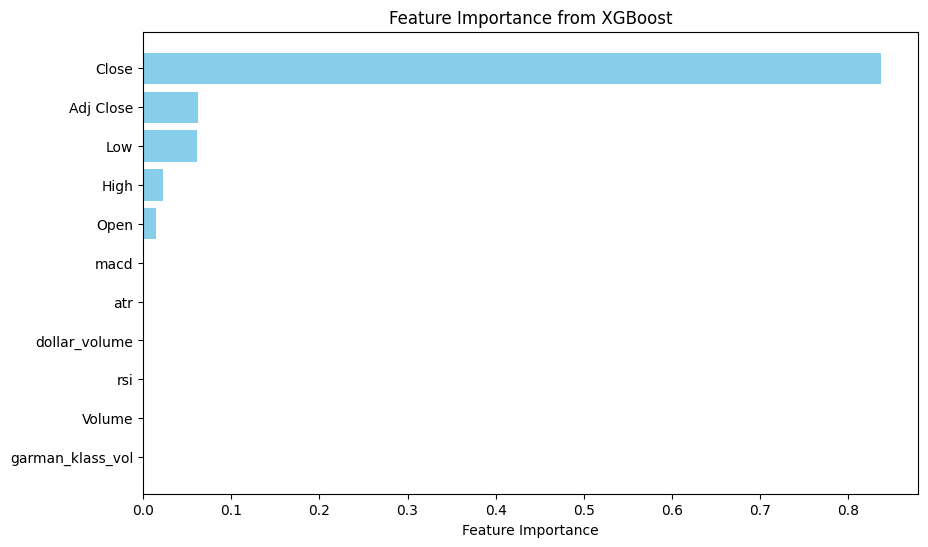

Shape of X_lstm_train: (31992, 3, 11)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5708 - val_loss: 0.0817
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0554 - val_loss: 0.0219
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0150 - val_loss: 0.0094
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0040 - val_loss: 0.0033
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 12/50
1000/1000 ━━━━━━━━━━━━━━

In [ ]:
# Dataset and Features
df = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(inplace=True)

# Features to use for clustering
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
X = df[features]
y = df['Close']  # Target variable ('Close' price to predict)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardized input features

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Fit the XGBoost model to determine feature importance
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Extract feature importances and map them to feature names
importances = xgboost_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importance with feature names on the y-axis
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

# Prepare data for LSTM Autoencoder (shaped for sequences)
timesteps = 3  # Define the number of previous time steps to use for each sequence
X_lstm_train = []
y_lstm_train = []

# Reshape the training data into sequences (Target is the same as input for autoencoder)
for i in range(timesteps, len(X_train)):
    X_lstm_train.append(X_train[i-timesteps:i])  # Input sequence (features over timesteps)
    y_lstm_train.append(X_train[i-timesteps:i])  # Target sequence (same as input for reconstruction)

X_lstm_train = np.array(X_lstm_train)
y_lstm_train = np.array(y_lstm_train)

# Reshape validation and test sets (ensure 3D shape: [samples, timesteps, features])
X_lstm_val = []
y_lstm_val = []

for i in range(timesteps, len(X_val)):
    X_lstm_val.append(X_val[i-timesteps:i])
    y_lstm_val.append(X_val[i-timesteps:i])

X_lstm_val = np.array(X_lstm_val)
y_lstm_val = np.array(y_lstm_val)

X_lstm_test = []
y_lstm_test = []

for i in range(timesteps, len(X_test)):
    X_lstm_test.append(X_test[i-timesteps:i])
    y_lstm_test.append(X_test[i-timesteps:i])

X_lstm_test = np.array(X_lstm_test)
y_lstm_test = np.array(y_lstm_test)

# Ensure LSTM input shape is (samples, timesteps, features)
print(f"Shape of X_lstm_train: {X_lstm_train.shape}")  # Should be (samples, timesteps, features)

#### Build the LSTM Autoencoder ####
latent_dim = 64  # Latent space dimension

# Encoder-Decoder Architecture (Autoencoder)
model = Sequential()
model.add(LSTM(latent_dim, activation='relu', input_shape=(timesteps, X_lstm_train.shape[2]), return_sequences=False))  # Encoder without return_sequences
model.add(RepeatVector(timesteps))  # Repeat the latent vector
model.add(LSTM(latent_dim, activation='relu', return_sequences=True))  # Decoder with return_sequences=True
model.add(TimeDistributed(Dense(X_lstm_train.shape[2])))  # Output layer (reconstruct original features)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the Autoencoder (input and target are both sequences)
model.fit(X_lstm_train, y_lstm_train, validation_data=(X_lstm_val, y_lstm_val), epochs=50, batch_size=32)

#### Evaluate the Autoencoder ####
# Predict the reconstructed sequences
reconstructed_X_train = model.predict(X_lstm_train)
reconstructed_X_test = model.predict(X_lstm_test)

# Calculate reconstruction error (MSE)
train_mse = mean_squared_error(X_lstm_train.reshape(-1, X_lstm_train.shape[2]), reconstructed_X_train.reshape(-1, X_lstm_train.shape[2]))
test_mse = mean_squared_error(X_lstm_test.reshape(-1, X_lstm_test.shape[2]), reconstructed_X_test.reshape(-1, X_lstm_test.shape[2]))

print(f'Train MSE (LSTM Autoencoder): {train_mse}')
print(f'Test MSE (LSTM Autoencoder): {test_mse}')

# Calculate reconstruction error (MAE)
train_mae = mean_absolute_error(X_lstm_train.reshape(-1, X_lstm_train.shape[2]), reconstructed_X_train.reshape(-1, X_lstm_train.shape[2]))
test_mae = mean_absolute_error(X_lstm_test.reshape(-1, X_lstm_test.shape[2]), reconstructed_X_test.reshape(-1, X_lstm_test.shape[2]))

print(f'Train MAE (LSTM Autoencoder): {train_mae}')
print(f'Test MAE (LSTM Autoencoder): {test_mae}')


### selecting only the APPLE stock data

In [ ]:
df_apple = df[df["Ticker_numeric"] == 0]
df_apple.dropna(inplace = True)
df_apple

<ipython-input-22-f6f0aa648faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple.dropna(inplace = True)


Date    Open    High     Low   Close  Adj Close     Volume  \
23014 2023-11-22  191.49  192.93  190.83  191.31     190.59   39617700   
23015 2023-11-21  191.41  191.52  189.74  190.64     189.92   38134500   
23016 2023-11-20  189.89  191.91  189.88  191.45     190.73   46505100   
23017 2023-11-17  190.25  190.38  188.57  189.69     188.97   50922700   
23018 2023-11-16  189.57  190.96  188.65  189.71     188.99   54412900   
...          ...     ...     ...     ...     ...        ...        ...   
29022 2000-01-06    0.95    0.96    0.85    0.85       0.72  767972800   
29023 2000-01-05    0.93    0.99    0.92    0.93       0.78  778321600   
29024 2000-01-04    0.97    0.99    0.90    0.92       0.77  512377600   
29025 2000-01-03    0.94    1.00    0.91    1.00       0.84  535796800   
29026 1999-12-31    0.90    0.92    0.89    0.92       0.78  163811200   

       garman_klass_vol        rsi    bb_low    bb_mid   bb_high       atr  \
23014          0.000051  46.250270  5.235042  5.265610  5.296178  1.532907   
23015          0.000020  44.568669  5.233622  5.264530  5.295437  1.531985   
23016          0.000049  47.020028  5.233390  5.263123  5.292857  1.538272   
23017          0.000028  42.700930  5.231908  5.261523  5.291137  1.566967   
23018          0.000070  42.763819  5.231762  5.259503  5.287245  1.508612   
...                 ...        ...       ...       ...       ...       ...   
29022         -0.022280  42.496994  0.515814  0.573109  0.630405  2.767520   
29023         -0.009262  47.727451  0.515814  0.573109  0.630405  2.749125   
29024         -0.016054  46.977787  0.516704  0.573678  0.630651  2.671331   
29025         -0.000440  52.477866  0.516971  0.575900  0.634830  2.671236   
29026         -0.007361  47.986677  0.516971  0.575900  0.634830  2.784005   

           macd  dollar_volume  Ticker_numeric  Company_Name_numeric  
23014 -2.008384    7550.737443               0                     7  
23015 -1.914235    7242.504240               0                     7  
23016 -1.754040    8869.917723               0                     7  
23017 -1.748942    9622.862619               0                     7  
23018 -1.723421   10283.493971               0                     7  
...         ...            ...             ...                   ...  
29022 -0.035367     552.940416               0                     7  
29023 -0.030522     607.090848               0                     7  
29024 -0.027176     394.530752               0                     7  
29025 -0.018661     450.069312               0                     7  
29026 -0.016564     127.772736               0                     7  

[5999 rows x 17 columns]

### performing K-Means clustering on PCA-reduced data for APPLE stock data

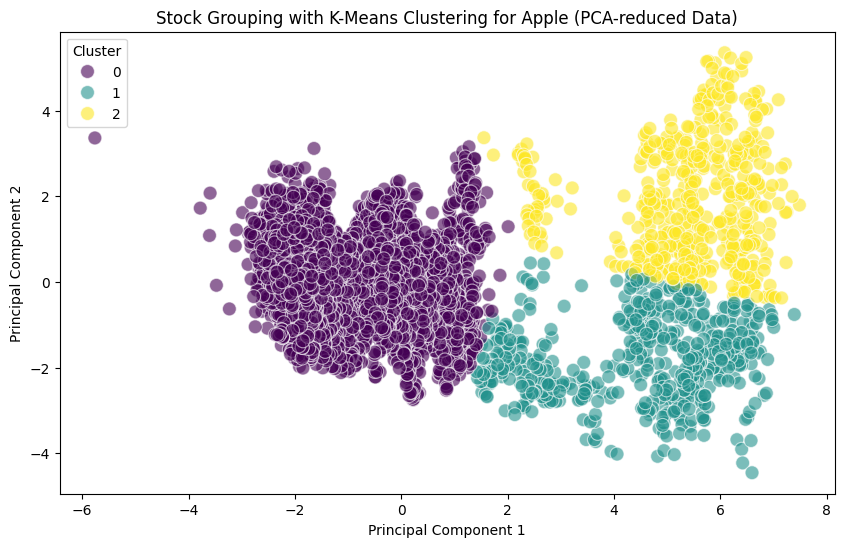

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd', 'dollar_volume']
df_apple = df[df["Ticker_numeric"] == 0]
df_apple = df_apple.dropna()
X_apple = df_apple[features]


# Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_apple)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with K-Means Clustering for Apple (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Performing a combination of PCA and t-SNE for visualization and clustering the data using K-Means.

df_pca columns: Index(['PCA1', 'PCA2', 'Cluster_KMeans'], dtype='object')


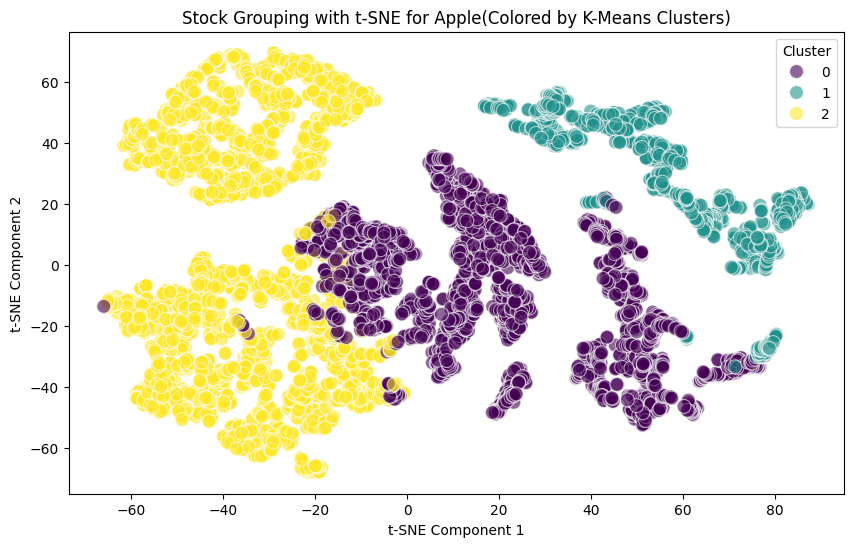

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster_KMeans'] = clusters

# Ensure Cluster_KMeans is added correctly
print("df_pca columns:", df_pca.columns)

# t-SNE for Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
if 'Cluster_KMeans' in df_pca.columns:
    df_tsne = df_tsne.join(df_pca[['Cluster_KMeans']])
else:
    print("Error: 'Cluster_KMeans' column not found in df_pca.")


# Visualizing t-SNE Results (Colored by K-Means Clusters)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster_KMeans', palette='viridis', s=100, alpha=0.6)
plt.title('Stock Grouping with t-SNE for Apple(Colored by K-Means Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

### training an XGBoost Regressor to determine feature importance.

X_train shape: (3359, 11), y_train shape: (3359,)
X_val shape: (1440, 11), y_val shape: (1440,)
X_test shape: (1200, 11), y_test shape: (1200,)


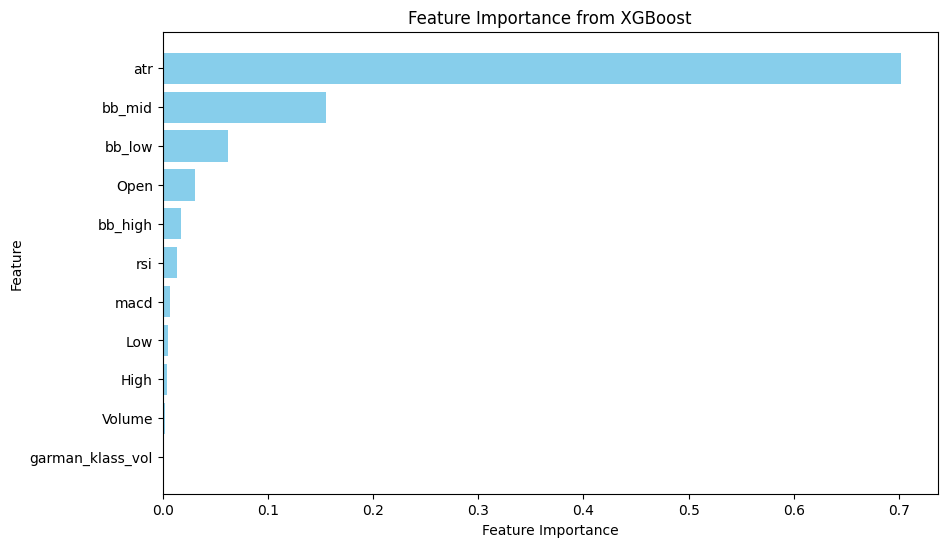

In [ ]:
y = df_apple["Close"]
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Split the training+validation set into separate training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Print the shapes of each dataset to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
# Fit the XGBoost model to determine feature importance
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_scaled, y)  # X_scaled: input features, y: target variable (e.g., closing price)

# Plot feature importance
#xgb.plot_importance(xgboost_model)


# Extract top important features based on F-score
important_features = xgboost_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': important_features
})

# Sort the feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a barh plot (horizontal bar plot) for better readability
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.show()

## Filters stock data for APPLE.
### Using XGBoost to train a model on the training data and plots feature importance.
### Prepares the data for an LSTM model, which is designed to handle time series data.
### Trains and evaluates the LSTM model.

In [ ]:


# Load the data
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

# Define the training and testing date ranges
train_start_date = pd.to_datetime('2010-01-01')
train_end_date = pd.to_datetime('2015-01-01')
test_start_date = pd.to_datetime('2015-01-01')
test_end_date = pd.to_datetime('2016-01-01')

# Split the data based on the date ranges
train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define the features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd', 'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']
X_train_val = train_data[features]
y_train_val = train_data['Close']  # Target variable for training

X_test = test_data[features]
y_test = test_data['Close']  # Target variable for testing

# Standardize the data
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_scaled, y_train_val, test_size=0.25, random_state=42)

# Prepare the data for LSTM
timesteps = 3  # Define the number of previous time steps to use
X_lstm_train = []
y_lstm_train = []

# Reshape the training data into sequences
for i in range(timesteps, len(X_train)):
    X_lstm_train.append(X_train[i-timesteps:i])  # Take 'timesteps' previous rows for each sequence
    y_lstm_train.append(y_train.iloc[i])         # The target is the value at the current time step

X_lstm_train = np.array(X_lstm_train)
y_lstm_train = np.array(y_lstm_train).reshape(-1, 1)  # Ensure target is a 2D array

# Ensure LSTM input shape is (samples, timesteps, features)
print(f"Shape of X_lstm_train: {X_lstm_train.shape}")  # Should be (samples, timesteps, features)
print(f"Shape of y_lstm_train: {y_lstm_train.shape}")  # Should be (samples, 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
model.add(Dense(1))  # Output layer for predicting stock price

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_lstm_train, y_lstm_train, validation_split=0.2, epochs=50, batch_size=32)

# Prepare the test data for LSTM
X_lstm_test = []
y_lstm_test = []

for i in range(timesteps, len(X_test_scaled)):
    X_lstm_test.append(X_test_scaled[i-timesteps:i])
    y_lstm_test.append(y_test.iloc[i])

X_lstm_test = np.array(X_lstm_test)
y_lstm_test = np.array(y_lstm_test).reshape(-1, 1)  # Ensure target is a 2D array

# Ensure LSTM input shape is correct for the test data
print(f"Shape of X_lstm_test: {X_lstm_test.shape}")  # Should be (samples, timesteps, features)
print(f"Shape of y_lstm_test: {y_lstm_test.shape}")  # Should be (samples, 1)



Shape of X_lstm_train: (940, 3, 14)
Shape of y_lstm_train: (940, 1)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 294.1660 - val_loss: 239.9851
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 216.9302 - val_loss: 115.7602
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.9950 - val_loss: 86.7167
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.7012 - val_loss: 66.8455
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.1689 - val_loss: 58.5063
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.4231 - val_loss: 51.6125
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.3366 - val_loss: 48.6651
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.7805 - val_loss: 41.2649
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.8022 - val_loss: 36.4269
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.7005 - val_loss: 34.5447
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.4101 - val_loss: 32.6029
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

In [ ]:
# Evaluate LSTM model
loss = model.evaluate(X_lstm_test, y_lstm_test, verbose=0)
print(f"LSTM Model Loss (Mean Squared Error) on Test Set: {loss}")

# Predict the test set
y_pred = model.predict(X_lstm_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_lstm_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_lstm_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_lstm_test, y_pred)
print(f"R-squared (R²): {r2}")

LSTM Model Loss (Mean Squared Error) on Test Set: 128.8673858642578
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Root Mean Squared Error (RMSE): 11.351977473710186
Mean Absolute Error (MAE): 11.045978205883838
R-squared (R²): -34.89267772783257


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0268 - val_loss: 0.3499
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.0041 - val_loss: 0.3256
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.0595 - val_loss: 0.3036
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9629 - val_loss: 0.2843
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.9751 - val_loss: 0.2671
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.9706 - val_loss: 0.2510
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9292 - val_loss: 0.2357
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.9184 - val_loss: 0.2215
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.8697 - val_loss: 0.2088
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.8599 - val_loss: 0.1972
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.8963 - val_loss: 0.1861
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8578 - val_loss: 0.1762
Epoch 13/50
1

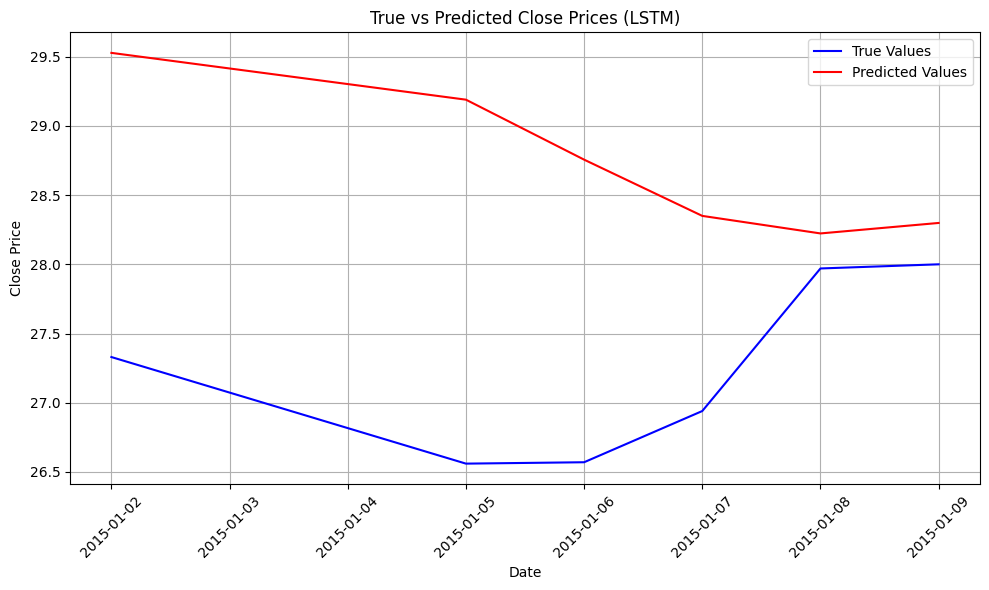

In [ ]:
# Load dataset
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

train_start_date = pd.to_datetime('2014-12-01')
train_end_date = pd.to_datetime('2015-01-01')
test_start_date = pd.to_datetime('2015-01-01')
test_end_date = pd.to_datetime('2015-01-15')

train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define features and target
X_train_val = train_data[['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd', 'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]
y_train_val = train_data['Close']  # Target variable

X_test = test_data[['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd', 'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]
y_test = test_data['Close']  # Target variable for testing

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale features and target using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Scale target (y) values separately
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Prepare data for LSTM (sequence-based)
timesteps = 3  # Use 10 previous time steps
X_lstm_train, y_lstm_train = [], []
X_lstm_val, y_lstm_val = [], []

# Create sequences for training set
for i in range(timesteps, len(X_train_scaled)):
    X_lstm_train.append(X_train_scaled[i-timesteps:i])
    y_lstm_train.append(y_train_scaled[i])

X_lstm_train = np.array(X_lstm_train)
y_lstm_train = np.array(y_lstm_train)

# Create sequences for validation set
for i in range(timesteps, len(X_val_scaled)):
    X_lstm_val.append(X_val_scaled[i-timesteps:i])
    y_lstm_val.append(y_val_scaled[i])

X_lstm_val = np.array(X_lstm_val)
y_lstm_val = np.array(y_lstm_val)

# Define LSTM model with Dropout to reduce overfitting
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_lstm_train.shape[1], X_lstm_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout to reduce overfitting
model.add(Dense(1))  # Output layer for predicting stock price

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model on training data and validate on validation data
model.fit(X_lstm_train, y_lstm_train, validation_data=(X_lstm_val, y_lstm_val), epochs=50, batch_size=32)

# Prepare test data for LSTM (sequence-based)
X_lstm_test, y_lstm_test = [], []
for i in range(timesteps, len(X_test_scaled)):
    X_lstm_test.append(X_test_scaled[i-timesteps:i])
    y_lstm_test.append(y_test_scaled[i])

X_lstm_test = np.array(X_lstm_test)
y_lstm_test = np.array(y_lstm_test)

# Evaluate the LSTM model
loss = model.evaluate(X_lstm_test, y_lstm_test)
print(f"LSTM Model Loss (Mean Squared Error) on Test Set: {loss}")

# Make predictions on test data
y_pred_scaled = model.predict(X_lstm_test)

# Inverse transform predictions to get the original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_lstm_test_orig = target_scaler.inverse_transform(y_lstm_test)

# Now, plot the true vs predicted values
import matplotlib.pyplot as plt

# Align dates for the plot (skip the first 'timesteps' rows)
aligned_dates = test_data['Date'].iloc[timesteps:]

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(aligned_dates, y_lstm_test_orig, label='True Values', color='blue', markersize=4)
plt.plot(aligned_dates, y_pred, label='Predicted Values', color='red', linestyle='-', markersize=4)

# Add title, labels, and grid
plt.title('True vs Predicted Close Prices (LSTM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### Using the LightGBM with tuned hyperparameters to predict the closing price of Apple

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 7
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2568, number of used features: 7
[LightGBM] [Info] Start training from score -0.001371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2568, number of used features: 7
[LightGBM] [Info] Start trainin

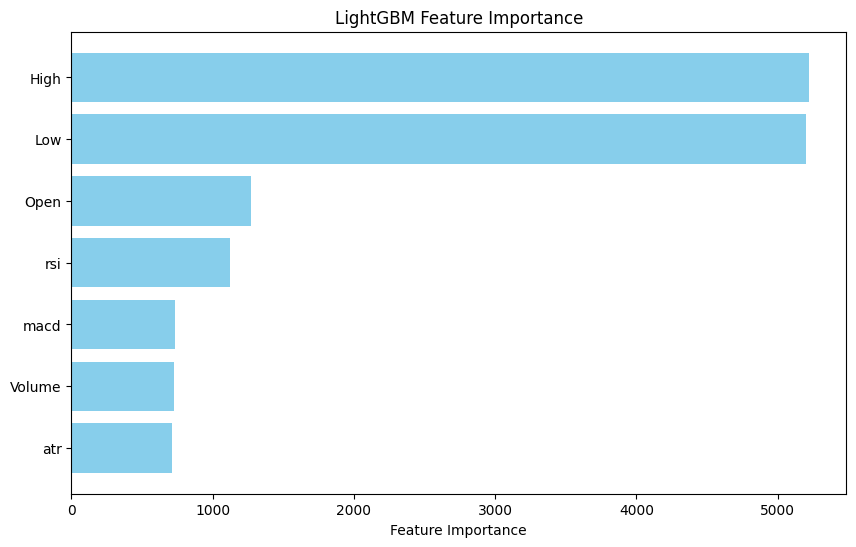

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Load dataset
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

# Expand the training window to include more data
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2022-01-01')
test_start_date = pd.to_datetime('2022-01-01')
test_end_date = pd.to_datetime('2022-12-31')

train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define a simplified set of features and the target (Close price)
X_train_val = train_data[['Open', 'High', 'Low', 'Volume', 'rsi', 'macd', 'atr']]
y_train_val = train_data['Close']

X_test = test_data[['Open', 'High', 'Low', 'Volume', 'rsi', 'macd', 'atr']]
y_test = test_data['Close']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Scale target (y) values separately
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Tune the LightGBM model with adjusted hyperparameters
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,         # Increase number of boosting rounds
    learning_rate=0.01,       # Decrease learning rate
    num_leaves=31,            # Default number of leaves
    max_depth=-1,             # Use full tree depth
    random_state=42
)
lgb_model.fit(X_train_scaled, y_train_scaled.ravel())  # Flatten y for training

# Cross-validate the model
cv_scores = cross_val_score(lgb_model, X_train_scaled, y_train_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_cv_scores.mean()} ± {rmse_cv_scores.std()}")

# Predict on the validation set
y_val_pred_scaled = lgb_model.predict(X_val_scaled)

# Inverse transform the predictions back to the original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (LightGBM): {rmse_val}")
print(f"Validation MAE (LightGBM): {mae_val}")
print(f"Validation R-squared (LightGBM): {r2_val}")

# Predict on the test set
y_test_pred_scaled = lgb_model.predict(X_test_scaled)

# Inverse transform the predictions back to the original scale
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE (LightGBM): {rmse_test}")
print(f"Test MAE (LightGBM): {mae_test}")
print(f"Test R-squared (LightGBM): {r2_test}")

# Check and plot feature importances with actual feature names on the y-axis
importances = lgb_model.feature_importances_
feature_names = X_train.columns  # Get the feature names from the training data

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importances with feature names on the y-axis
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')
plt.show()

# Compute permutation feature importance if no feature importance is calculated by LightGBM
if np.sum(importances) == 0:
    print("No feature importances were calculated, using permutation importance.")
    perm_importance = permutation_importance(lgb_model, X_test_scaled, y_test_scaled.ravel(), n_repeats=10, random_state=42)

    # Plot permutation feature importance
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.barh(range(X_train_scaled.shape[1]), perm_importance.importances_mean[sorted_idx])
    plt.yticks(range(X_train_scaled.shape[1]), X_train.columns[sorted_idx])
    plt.xlabel("Permutation Feature Importance")
    plt.title("Permutation Feature Importance")
    plt.show()


### True vs Predicted stock values of APPLE using LightGBM

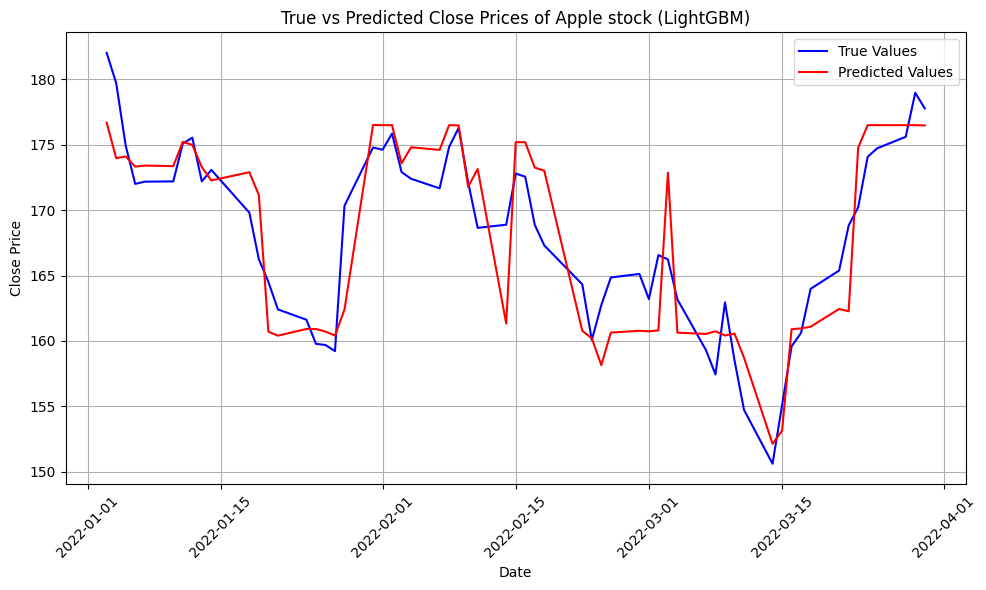

In [ ]:
# Plot predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data['Date'], y_test_pred, label='Predicted Values', color='red', linestyle='-', markersize=4)

# Add title, labels, and grid
plt.title('True vs Predicted Close Prices of Apple stock (LightGBM)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### True vs Predicted stock values using XGBoost
### Using the XGBoost with tuned hyperparameters to predict the closing price of Apple

Cross-validated RMSE: 0.019334314715055315 ± 0.00262996095031263
Validation RMSE (XGBoost): 0.6346855945171795
Validation MAE (XGBoost): 0.3189082134505299
Validation R-squared (XGBoost): 0.9997241602561736
Test RMSE (XGBoost): 3.2874229814021816
Test MAE (XGBoost): 2.652402944095798
Test R-squared (XGBoost): 0.7733036580378028


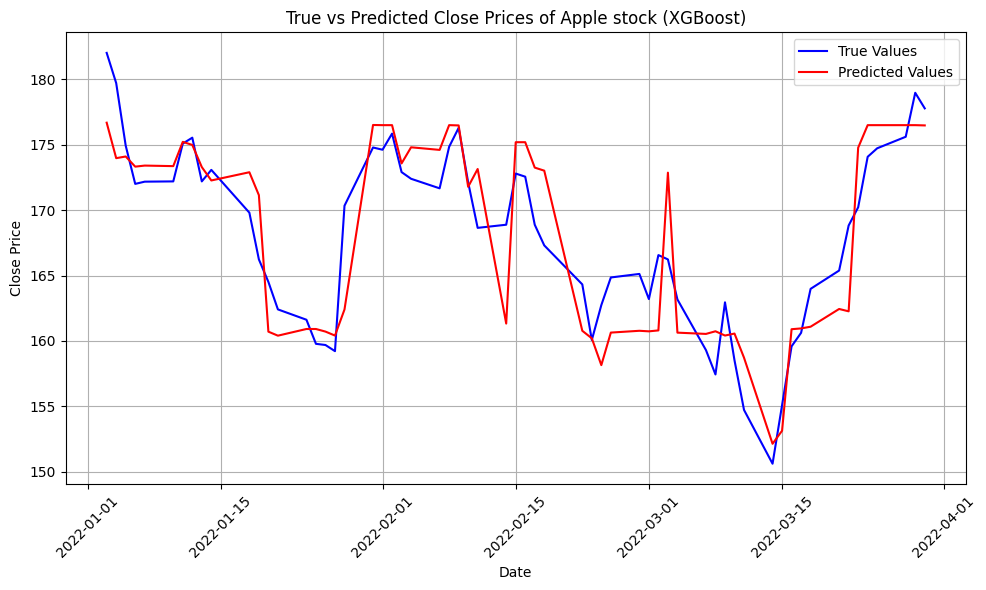

In [ ]:
# Load dataset
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 0
df_company = df1[df1['Ticker_numeric'] == 0]

# Expand the training window to include more data
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2022-01-01')
test_start_date = pd.to_datetime('2022-01-01')
test_end_date = pd.to_datetime('2022-03-31')

train_data = df_company[(df_company['Date'] >= train_start_date) & (df_company['Date'] < train_end_date)]
test_data = df_company[(df_company['Date'] >= test_start_date) & (df_company['Date'] < test_end_date)]

# Define a simplified set of features and the target (Close price)
X_train_val = train_data[['Open', 'macd','Low', 'Volume','garman_klass_vol','rsi','atr','bb_low', 'bb_mid', 'bb_high','High']]
y_train_val = train_data['Close']
#X_train_val = train_data[['Open', 'High', 'Low', 'Volume',
       #'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       #'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]
#X_test = test_data[['Open', 'High', 'Low', 'Volume',
       #'garman_klass_vol', 'rsi', 'bb_low', 'bb_mid', 'bb_high', 'atr', 'macd',
       #'dollar_volume', 'Ticker_numeric', 'Company_Name_numeric']]

X_test = test_data[['Open','macd','Low', 'Volume','garman_klass_vol','rsi','atr','bb_low', 'bb_mid', 'bb_high','High']]
y_test = test_data['Close']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Scale target (y) values separately
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,         # Increase number of boosting rounds
    learning_rate=0.01,       # Decrease learning rate
    max_depth=6,              # Tree depth
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_scaled.ravel())  # Flatten y for training

# Cross-validate the model
cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_cv_scores.mean()} ± {rmse_cv_scores.std()}")

# Predict on the validation set
y_val_pred_scaled = xgb_model.predict(X_val_scaled)

# Inverse transform the predictions back to the original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (XGBoost): {rmse_val}")
print(f"Validation MAE (XGBoost): {mae_val}")
print(f"Validation R-squared (XGBoost): {r2_val}")

# Predict on the test set
y_test_pred_scaled = xgb_model.predict(X_test_scaled)

# Inverse transform the predictions back to the original scale
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE (XGBoost): {rmse_test}")
print(f"Test MAE (XGBoost): {mae_test}")
print(f"Test R-squared (XGBoost): {r2_test}")

# Plot predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data['Date'], y_test_pred, label='Predicted Values', color='red', linestyle='-', markersize=4)

# Add title, labels, and grid
plt.title('True vs Predicted Close Prices of Apple stock (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Load dataset of Microsoft
# Using the LightGBM with tuned hyperparameters to predict the closing price of Apple
df1 = pd.read_csv("/content/drive/MyDrive/Milestone II/Top_10_NASDAQ.csv")
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter data for the company with ticker_numeric = 28
df_company_ms = df1[df1['Ticker_numeric'] == 28]

# Expand the training window to include more data
train_start_date = pd.to_datetime('2005-01-01')
train_end_date = pd.to_datetime('2022-01-01')
test_start_date = pd.to_datetime('2022-01-01')
test_end_date = pd.to_datetime('2022-12-31')

train_data1 = df_company_ms[(df_company_ms['Date'] >= train_start_date) & (df_company_ms['Date'] < train_end_date)]
test_data1 = df_company_ms[(df_company_ms['Date'] >= test_start_date) & (df_company_ms['Date'] < test_end_date)]

# Define a simplified set of features and the target (Close price)
X_train_val = train_data1[['Open', 'High', 'Low', 'Volume', 'rsi', 'macd', 'atr']]
y_train_val = train_data1['Close']

X_test = test_data1[['Open', 'High', 'Low', 'Volume', 'rsi', 'macd', 'atr']]
y_test = test_data1['Close']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Scale target (y) values separately
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = target_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Tune the LightGBM model with adjusted hyperparameters
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,         # Increase number of boosting rounds
    learning_rate=0.01,       # Decrease learning rate
    num_leaves=31,            # Default number of leaves
    max_depth=-1,             # Use full tree depth
    random_state=42
)
lgb_model.fit(X_train_scaled, y_train_scaled.ravel())  # Flatten y for training

# Cross-validate the model
cv_scores = cross_val_score(lgb_model, X_train_scaled, y_train_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {rmse_cv_scores.mean()} ± {rmse_cv_scores.std()}")

# Predict on the validation set
y_val_pred_scaled = lgb_model.predict(X_val_scaled)

# Inverse transform the predictions back to the original scale
y_val_pred = target_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (LightGBM): {rmse_val}")
print(f"Validation MAE (LightGBM): {mae_val}")
print(f"Validation R-squared (LightGBM): {r2_val}")

# Predict on the test set
y_test_pred_scaled = lgb_model.predict(X_test_scaled)

# Inverse transform the predictions back to the original scale
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

# Evaluate the performance on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE (LightGBM): {rmse_test}")
print(f"Test MAE (LightGBM): {mae_test}")
print(f"Test R-squared (LightGBM): {r2_test}")





[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 7
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2568, number of used features: 7
[LightGBM] [Info] Start training from score 0.001122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2568, number of used features: 7
[LightGBM] [Info] Start training

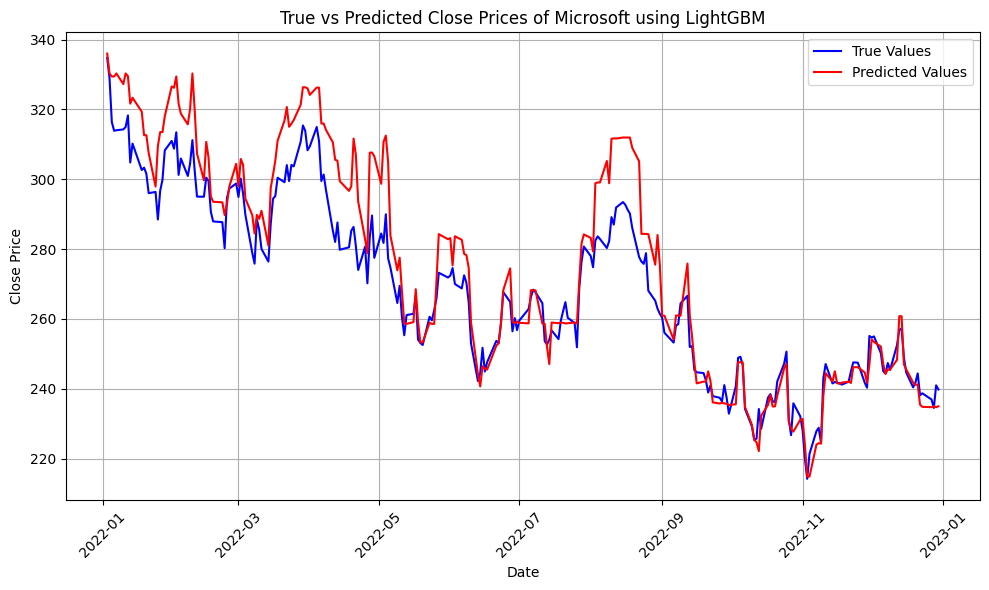

In [ ]:
# Plot predicted vs actual values for the test set of Microsoft
plt.figure(figsize=(10, 6))
plt.plot(test_data1['Date'], y_test, label='True Values', color='blue', markersize=4)
plt.plot(test_data1['Date'], y_test_pred, label='Predicted Values', color='red', linestyle='-', markersize=4)

# Add title, labels, and grid
plt.title('True vs Predicted Close Prices of Microsoft using LightGBM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

### After doing the stand up, the following changes were done

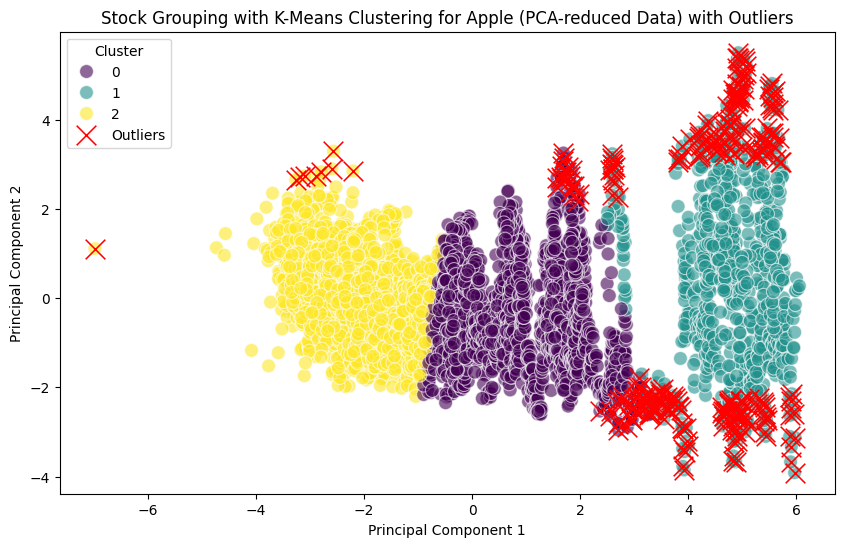

Number of outliers detected: 300
Outlier details:
          PCA1      PCA2  Cluster  Outlier
180  -2.206555  2.853103        2     True
181  -2.882629  2.734011        2     True
182  -2.597990  2.900663        2     True
183  -3.178686  2.726154        2     True
185  -2.789324  2.833765        2     True
...        ...       ...      ...      ...
5981  5.908540 -3.333332        1     True
5982  5.877753 -3.100135        1     True
5983  5.880469 -2.631178        1     True
5984  5.917413 -2.144625        1     True
5985  5.876289 -2.209443        1     True

[300 rows x 4 columns]


In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'garman_klass_vol', 'rsi', 'atr', 'macd','bb_low', 'bb_mid', 'bb_high']

# Assuming df_apple is already defined
X_apple = df[df["Ticker_numeric"] == 0]  # Example of filtering, if needed
X_apple = df_apple[features]


# Step 1: Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_apple)

# Step 2: Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters

# Step 4: Outlier Detection
# Calculate distances from each point to its cluster centroid
distances = np.linalg.norm(X_pca - kmeans.cluster_centers_[kmeans.labels_], axis=1)
#distances = np.linalg.norm(X_pca, axis=1)


# Set a threshold for outliers (e.g., 95th percentile of distances)
threshold = np.percentile(distances, 95)

# Identify outliers
df_pca['Outlier'] = distances > threshold

# Visualizing Clusters with Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Highlight outliers with a different marker and color
sns.scatterplot(data=df_pca[df_pca['Outlier'] == True], x='PCA1', y='PCA2', color='red', marker='x', s=200, label='Outliers')

plt.title('Stock Grouping with K-Means Clustering for Apple (PCA-reduced Data) with Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Optional: Print outlier information
print(f"Number of outliers detected: {df_pca['Outlier'].sum()}")
print("Outlier details:")
print(df_pca[df_pca['Outlier'] == True])

Outliers in the original dataset:
            Date    Open    High     Low   Close  Adj Close     Volume  \
28846 2000-09-18    0.99    1.08    0.98    1.08       0.91  424536000   
28845 2000-09-19    1.07    1.08    1.05    1.07       0.90  271510400   
28844 2000-09-20    1.06    1.10    1.05    1.09       0.92  227388000   
28843 2000-09-21    1.04    1.06    0.99    1.01       0.85  510490400   
28841 2000-09-25    0.94    0.99    0.93    0.96       0.81  435551200   
...          ...     ...     ...     ...     ...        ...        ...   
23031 2023-10-30  169.02  171.17  168.87  170.29     169.42   51131000   
23030 2023-10-31  169.35  170.90  167.90  170.77     169.90   44846000   
23029 2023-11-01  171.00  174.23  170.12  173.97     173.08   56934900   
23028 2023-11-02  175.52  177.78  175.46  177.57     176.67   77334800   
23027 2023-11-03  174.24  176.82  173.35  176.65     175.75   79763700   

       garman_klass_vol        rsi    bb_low    bb_mid   bb_high       atr  \

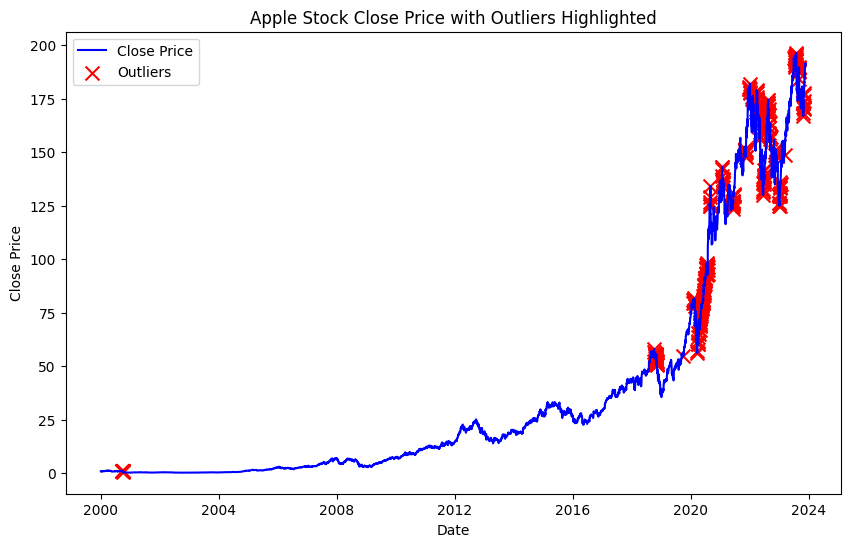

In [ ]:
outlier_indices = df_pca[df_pca['Outlier'] == True].index

# Step 2: Map the outliers back to the original dataset (df_apple)
outlier_data = df_apple.iloc[outlier_indices]

# Step 3: Investigate the original features (e.g., Date, Open, Close, etc.)
print("Outliers in the original dataset:")
print(outlier_data)  # Example of columns to investigate



# Step 4: Visualize or analyze any specific periods or events
plt.figure(figsize=(10, 6))
plt.plot(df_apple['Date'], df_apple['Close'], label='Close Price', color='blue')
plt.scatter(outlier_data['Date'], outlier_data['Close'], color='red', label='Outliers', marker='x', s=100)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Close Price with Outliers Highlighted')
plt.legend()
plt.show()

<ipython-input-53-8dbb9b570492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_data['Date'] = pd.to_datetime(outlier_data['Date'])


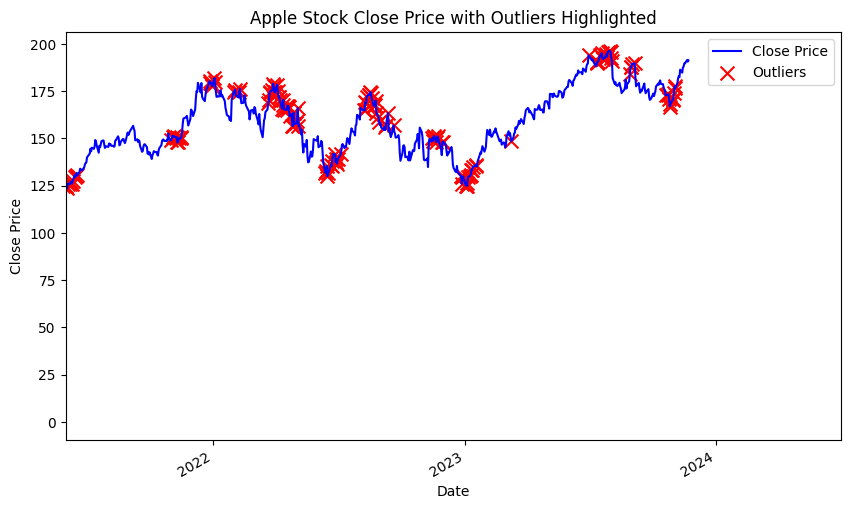

In [ ]:
import matplotlib.dates as mdates
from datetime import datetime

df_apple['Date'] = pd.to_datetime(df_apple['Date'])
outlier_data['Date'] = pd.to_datetime(outlier_data['Date'])
# Plot Apple Stock Close Price with Outliers Highlighted
df_apple = df_apple.iloc[::-1]
plt.figure(figsize=(10, 6))
plt.plot(df_apple['Date'], df_apple['Close'], label='Close Price', color='blue')
plt.scatter(outlier_data['Date'], outlier_data['Close'], color='red', label='Outliers', marker='x', s=100)

# Formatting the x-axis to improve date visibility
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks to yearly intervals
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format date ticks to show only the year
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.xlim([datetime(2021, 6, 1), datetime(2024, 6, 30)])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Stock Close Price with Outliers Highlighted')
plt.legend()
plt.show()